In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline


1. Tree-Based Methods
(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are nu- meric.

In [2]:
APS_train_raw = pd.read_csv("../Homework 6 Data/aps_failure_training_set.csv", skiprows=20, na_values='na')
display(APS_train_raw)
APS_test_raw = pd.read_csv("../Homework 6 Data/aps_failure_test_set.csv", skiprows=20, na_values='na')  
display(APS_test_raw)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


(b) Data Preparation
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 1
i. Research what types of techniques are usually used for dealing with data with missing values.2 Pick at least one of them and apply it to this data in the next steps.3

In [3]:
APS_train_raw['class'] = APS_train_raw['class'].map({'neg': 0, 'pos': 1})
APS_test_raw['class'] = APS_test_raw['class'].map({'neg': 0, 'pos': 1})

imputer = SimpleImputer(strategy='median') 
APS_train_imputed = pd.DataFrame(imputer.fit_transform(APS_train_raw), columns=APS_train_raw.columns)
APS_test_imputed = pd.DataFrame(imputer.transform(APS_test_raw), columns=APS_test_raw.columns)
display(APS_train_imputed)
display(APS_test_imputed)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,153002.0,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0.0,2286.0,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,112.0,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0.0,80292.0,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,60.0,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0.0,82.0,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0.0,66002.0,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0.0,59816.0,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0.0,1814.0,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,81852.0,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0.0,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,79636.0,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0.0,110.0,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [4]:
APS_all_imputed = pd.concat([APS_train_imputed, APS_test_imputed], axis=0)
display(APS_all_imputed)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,81852.0,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0.0,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,79636.0,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0.0,110.0,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0



ii. For each of the 170 features, calculate the coefficient of variation CV = ms , where s is sample standard deviation and m is sample mean.

In [5]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
APS_cv = pd.DataFrame(APS_all_imputed.drop(columns='class').apply(cv, axis=0), columns=['CV'])
display(APS_cv)


,CV
aa_000,432.860784
ab_000,974.052141
ac_000,230.929921
ad_000,27479.158074
ae_000,2327.135688
...,...
ee_007,493.540698
ee_008,337.389645
ee_009,582.100765
ef_000,5022.368123


iii. Plot a correlation matrix for your features using pandas

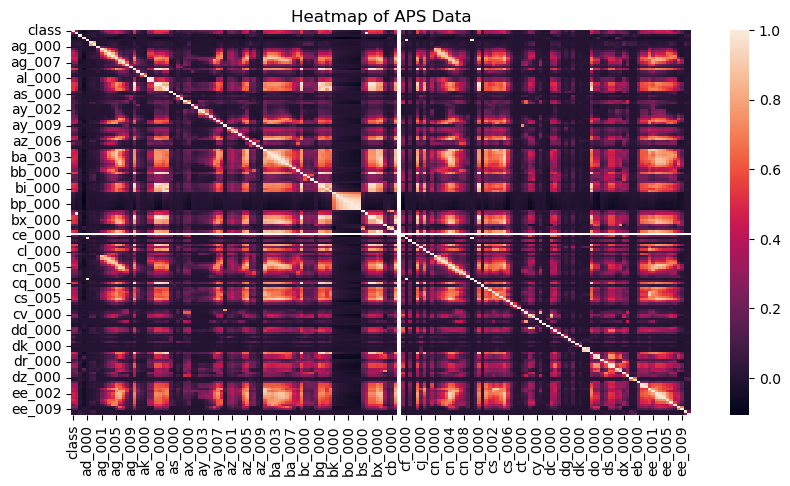

In [6]:
plt.figure(figsize=(10, 5))
sns.heatmap(APS_all_imputed.corr())
plt.title('Heatmap of APS Data')
plt.show()

iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [7]:
num_features = int(np.sqrt(170))  
APS_top_CV = APS_cv.sort_values(by="CV", ascending=False).head(num_features)
top_CV_index = APS_top_CV.index.to_list()
display(APS_top_CV)


,CV
cf_000,27559.581954
co_000,27506.813766
ad_000,27479.158074
cs_009,19472.093673
dj_000,13091.523284
dh_000,12075.950444
df_000,11938.441082
as_000,11508.207704
ag_000,9250.751027
au_000,8699.224821


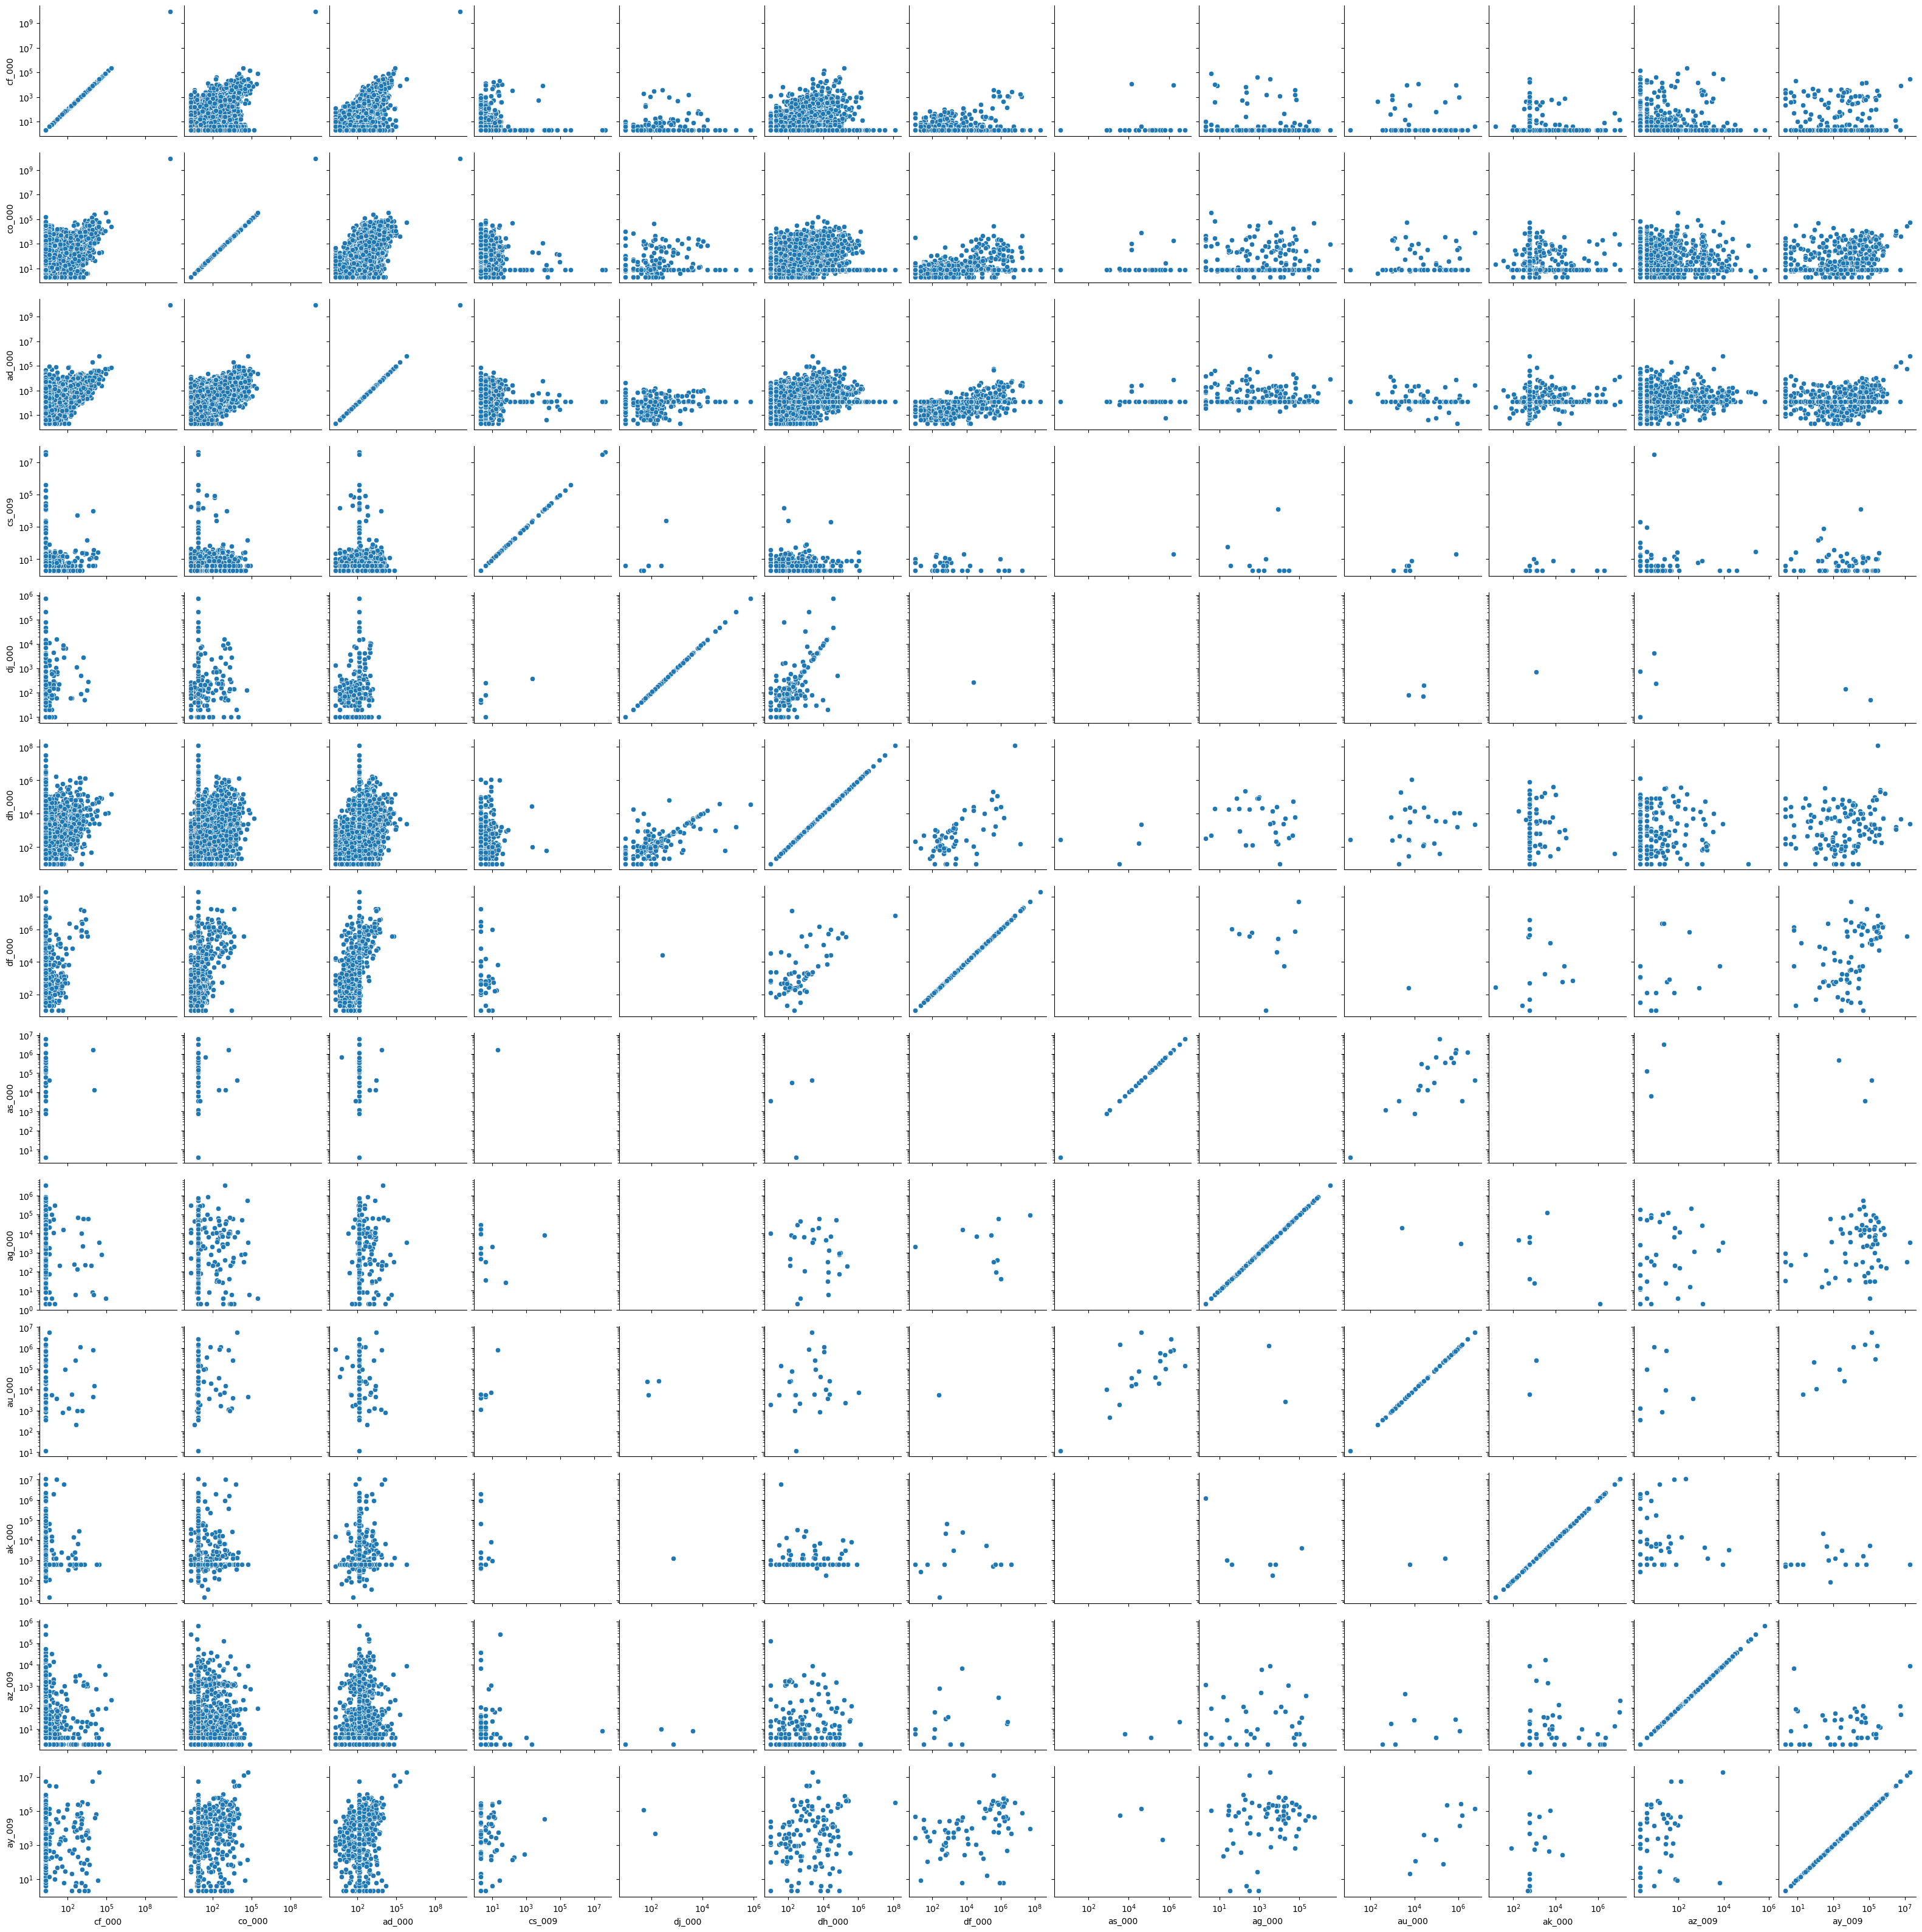

In [8]:
APS_top_CV_data = APS_all_imputed[top_CV_index]
pairplot = sns.pairplot(APS_top_CV_data, diag_kind=None)
pairplot.set(xscale = 'log', yscale = 'log')
plt.show()

can't see the sinification.

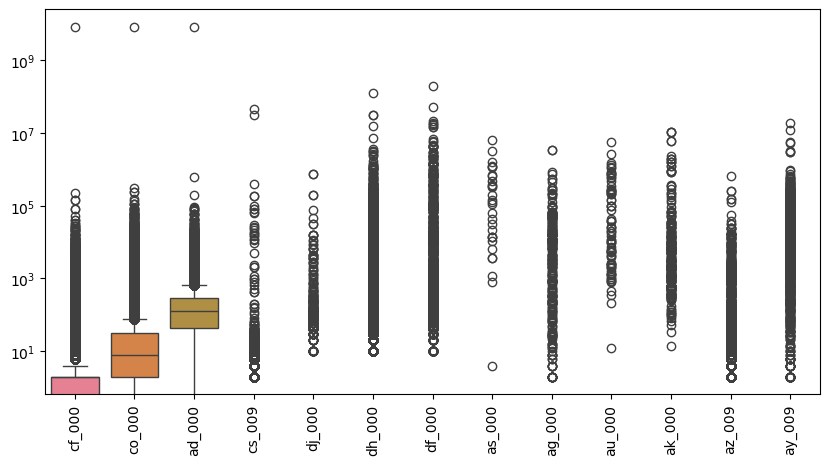

In [9]:
plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(data=APS_top_CV_data)
boxplot.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

v. Determine the number of positive and negative data. Is this data set imbal- anced?

In [10]:
display(APS_all_imputed['class'].value_counts())

class
0.0    74625
1.0     1375
Name: count, dtype: int64

yes, it is highly inbalanced.

(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [11]:
X_train = APS_train_imputed.drop(columns='class')
y_train = APS_train_imputed['class']
X_test = APS_test_imputed.drop(columns='class')
y_test = APS_test_imputed['class']

In [12]:
rf_model = RandomForestClassifier(oob_score=True)
rf_model.fit(X_train, y_train)
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [13]:
train_conf_matrix = confusion_matrix(y_train, y_pred_train)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
print('Train Confusion Matrix:')
print(train_conf_matrix)
print('Test Confusion Matrix:')
print(test_conf_matrix)

Train Confusion Matrix:
[[59000     0]
 [    0  1000]]
Test Confusion Matrix:
[[15607    18]
 [  109   266]]


In [14]:
fpr_train, tpr_train, _ = roc_curve(y_train, rf_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

train_auc = auc(fpr_train, tpr_train)
test_auc = auc(fpr_test, tpr_test)

print('Train AUC: ', train_auc)
print('Test AUC: ', test_auc)

Train AUC:  1.0
Test AUC:  0.9942529706666668


In [15]:
train_miss = 1 - accuracy_score(y_train, y_pred_train)
test_miss = 1 - accuracy_score(y_test, y_pred_test)

print('Train Misclassification Rate: ', train_miss)
print('Test Misclassification Rate: ', test_miss)

Train Misclassification Rate:  0.0
Test Misclassification Rate:  0.007937500000000042


In [16]:
oob_error = 1 - rf_model.oob_score_
print('OOB Error: ', oob_error)

OOB Error:  0.006133333333333324


(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

In [17]:
rf_balanced = RandomForestClassifier(class_weight='balanced', oob_score=True)
rf_balanced.fit(X_train, y_train)
y_pred_train = rf_balanced.predict(X_train)
y_pred_test = rf_balanced.predict(X_test)

In [18]:
train_conf_matrix_balanced = confusion_matrix(y_train, y_pred_train)
test_conf_matrix_balanced = confusion_matrix(y_test, y_pred_test)
print('Train Confusion Matrix (Balanced):')
print(train_conf_matrix_balanced)
print('Test Confusion Matrix (Balanced):')
print(test_conf_matrix_balanced)

fpr_train_balanced, tpr_train_balanced, _ = roc_curve(y_train, rf_balanced.predict_proba(X_train)[:, 1])
fpr_test_balanced, tpr_test_balanced, _ = roc_curve(y_test, rf_balanced.predict_proba(X_test)[:, 1])
train_auc_balanced = auc(fpr_train_balanced, tpr_train_balanced)
test_auc_balanced = auc(fpr_test_balanced, tpr_test_balanced)
print('Train AUC (Balanced): ', train_auc_balanced)
print('Test AUC (Balanced): ', test_auc_balanced)

train_miss_balanced = 1 - accuracy_score(y_train, y_pred_train)
test_miss_balanced = 1 - accuracy_score(y_test, y_pred_test)
print('Train Misclassification Rate (Balanced): ', train_miss_balanced)
print('Test Misclassification Rate (Balanced): ', test_miss_balanced)

oob_error_balanced = 1 - rf_balanced.oob_score_
print('OOB Error (Balanced): ', oob_error_balanced)


Train Confusion Matrix (Balanced):
[[59000     0]
 [    0  1000]]
Test Confusion Matrix (Balanced):
[[15609    16]
 [  164   211]]
Train AUC (Balanced):  1.0
Test AUC (Balanced):  0.9916916906666667
Train Misclassification Rate (Balanced):  0.0
Test Misclassification Rate (Balanced):  0.011249999999999982
OOB Error (Balanced):  0.007716666666666705


we find that randomforest classifier without compasion would perform better, however since the dataset is imbalance, the decision tree is relying on the majority of the class samples to make decisions.

(e) XGBoost and Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has Pj βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [19]:
alpha = [10**i for i in range(-4, 4)]

In [20]:
xgb_mse = []

for a in alpha:
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, alpha=a)
    accracies = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy')
    print('Alpha: ', a)
    print('Mean Accuracy: ', np.mean(accracies))
    xgb_mse.append(np.mean(accracies))



Alpha:  0.0001
Mean Accuracy:  0.9930500000000002
Alpha:  0.001
Mean Accuracy:  0.9929333333333334
Alpha:  0.01
Mean Accuracy:  0.9929666666666668
Alpha:  0.1
Mean Accuracy:  0.9930333333333333
Alpha:  1
Mean Accuracy:  0.9927666666666667
Alpha:  10
Mean Accuracy:  0.9920500000000001
Alpha:  100
Mean Accuracy:  0.9889833333333332
Alpha:  1000
Mean Accuracy:  0.9833333333333332


In [21]:
best_alpha = alpha[np.argmax(xgb_mse)]
print('Best Alpha: ', best_alpha)

Best Alpha:  0.0001


In [22]:
xgb_model_refit = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, alpha=best_alpha)
xgb_model_refit.fit(X_train, y_train)
y_pred_train = xgb_model_refit.predict(X_train)
y_pred_test = xgb_model_refit.predict(X_test)
print("train accuracy: ", accuracy_score(y_train, y_pred_train))
print("test accuracy: ", accuracy_score(y_test, y_pred_test))


train accuracy:  0.9953166666666666
test accuracy:  0.9906875


In [23]:
train_conf_matrix_refit = confusion_matrix(y_train, y_pred_train)
test_conf_matrix_refit = confusion_matrix(y_test, y_pred_test)
print('Train Confusion Matrix (Refit):')
print(train_conf_matrix_refit)
print('Test Confusion Matrix (Refit):')
print(test_conf_matrix_refit)

Train Confusion Matrix (Refit):
[[58936    64]
 [  217   783]]
Test Confusion Matrix (Refit):
[[15597    28]
 [  121   254]]


In [24]:
fpr_train_refit, tpr_train_refit, _ = roc_curve(y_train, xgb_model_refit.predict_proba(X_train)[:, 1])
fpr_test_refit, tpr_test_refit, _ = roc_curve(y_test, xgb_model_refit.predict_proba(X_test)[:, 1])
train_auc_refit = auc(fpr_train_refit, tpr_train_refit)
test_auc_refit = auc(fpr_test_refit, tpr_test_refit)
print('Train AUC (Refit): ', train_auc_refit)
print('Test AUC (Refit): ', test_auc_refit)
train_miss_refit = 1 - accuracy_score(y_train, y_pred_train)
test_miss_refit = 1 - accuracy_score(y_test, y_pred_test)
print('Train Misclassification Rate (Refit): ', train_miss_refit)
print('Test Misclassification Rate (Refit): ', test_miss_refit)

Train AUC (Refit):  0.9961753898305085
Test AUC (Refit):  0.9955367253333333
Train Misclassification Rate (Refit):  0.004683333333333373
Test Misclassification Rate (Refit):  0.009312499999999946


In [25]:
cv_scores = cross_val_score(xgb_model_refit, X_train, y_train, cv=10, scoring='roc_auc')
print('Cross-Validation AUC: ', np.mean(cv_scores))
print(f"Test AUC: {test_auc_refit}")

Cross-Validation AUC:  0.9896240677966099
Test AUC: 0.9955367253333333


If Cross-Validation AUC ≈ Test AUC, the model generalizes well. The Test AUC is slightly higher than Cross-Validation AUC which indicates data distribution differences.

In [29]:
pipeline = Pipeline([
    ('smote', SMOTE()),  
    ('xgbclassifier', xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

param_grid = {'xgbclassifier__reg_alpha': alpha}  

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', refit=True)
grid_search.fit(X_train, y_train)
print('Best Parameters: ', grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))


Best Parameters:  {'xgbclassifier__reg_alpha': 0.0001}
Train Accuracy:  0.97975
Test Accuracy:  0.980625


6.3.3. Suppose we estimate the regression coeﬀicients in a linear regression model by minimizing
0n ⎛ 0p ⎞ 2 ⎝yi − β0 − βjxij⎠
subject to
0p
|βj| ≤ s
for a particular value of s. For parts (a) through (e), indicate which
j=1
(a) As we increase s from 0, the training RSS will:
iv. Steadily decrease.
(b) Repeat (a) for test RSS.
ii. Decrease initially, and then eventually start increasing in a U shape.
(c) Repeat (a) for variance.
iii. Steadily increase.
(d) Repeat (a) for (squared) bias.
iv. Steadily decrease.
(e) Repeat (a) for the irreducible error.
v. Remain constant.

5. It is well-known that ridge regression tends to give similar coeﬀicient values to correlated variables, whereas the lasso may give quite dif- ferent coeﬀicient values to correlated variables. We will now explore this property in a very simple setting.
Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, supposethaty1+y2 =0andx11+x21 =0andx12+x22 =0,sothat the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: βˆ0 = 0.
(a) Write out the ridge regression optimization problem in this set- ting.
min(β1,β2){2[c−a(β1+β2)]^2+λ(β1^2+β2^2)}
where:a=x11=x12
c=y1,−c=y2
λ is the ridge regression penalty parameter.
(b) Argue that in this setting, the ridge coeﬀicient estimates satisfy βˆ 1 = βˆ 2 .
The predictors X1 and X2 are identical in magnitude for each observation, leading to a symmetric role for β1 and β2 in the model. The ridge penalty λ(β1^2+β2^2) is minimized (for a fixed sum β1+β2) when β1 = β2. The normal equations derived from the ridge optimization problem explicitly require β1 = β2.
(c) Write out the lasso optimization problem in this setting.
min(β1+β2){2[c−a(β1+β2)]^2+λ(∣β1∣+∣β2∣)}
(d) Argue that in this setting, the lasso coeﬀicients βˆ1 and βˆ2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.
not unique. because the lasso penalty does not distinguish between correlated predictors, allowing multiple ways to distribute the signal between β1 and β2.

5. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7, and0.75.
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?
Count the votes:Green: 4 votesRed: 6 votes Final Prediction: Majority vote favors Red.
Compute the average probability: Avg= 10*4.5=0.45
Compare to 0.5:0.45<0.5
0.45<0.5, so predict Green

3. Here we explore the maximal margin classifier on a toy data set.
9.7 Exercises 399
(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
Obs. X1 X2 Y
1 3 4 Red 2 2 2 Red 3 4 4 Red 4 1 4 Red 5 2 1 Blue 6 4 3 Blue 7 4 1 Blue
Sketch the observations.
X2 (vertical)
4 | R(1,4)       R(3,4)   R(4,4)
3 |                   B(4,3)
2 |     R(2,2)
1 |     B(2,1)           B(4,1)
  +------------------------------ X1 (horizontal)
    1     2     3     4
(b) Sketch the optimal separating hyperplane, and provide the equa- tion for this hyperplane (of the form (9.1)).
X2
4 | R(1,4)       R(3,4)   R(4,4) × (misclassified)
3 |                   B(4,3)
2 |     R(2,2)
1 |     B(2,1)           B(4,1)
  +------------------------------ X1
    1     2     3     4
(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.
Classify to Red if 1.25−1.5X1+X2 >0, otherwise classify to Blue.
(d) On your sketch, indicate the margin for the maximal margin hyperplane.

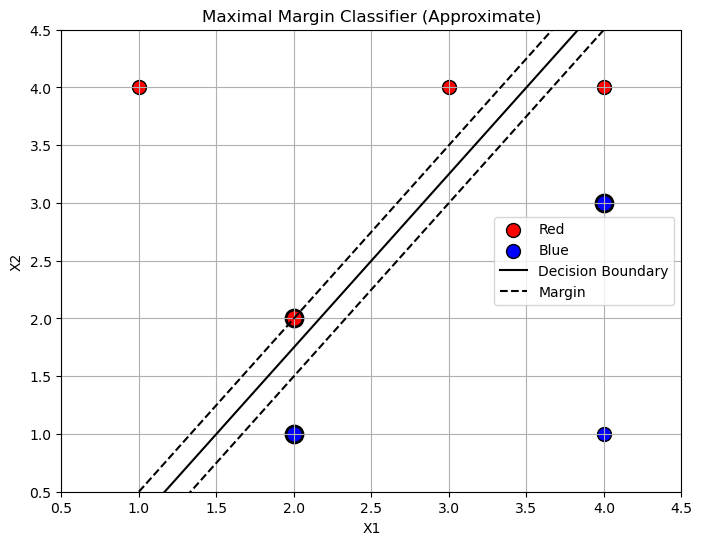

In [30]:
X = np.array([
    [3, 4],  
    [2, 2],  
    [4, 4],  
    [1, 4],  
    [2, 1],  
    [4, 3],  
    [4, 1]   
])
y = np.array(['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue'])

beta0, beta1, beta2 = 1.25, -1.5, 1

plt.figure(figsize=(8, 6))

for i in range(len(X)):
    if y[i] == 'Red':
        plt.scatter(X[i, 0], X[i, 1], c='red', s=100, edgecolors='k', label='Red' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], c='blue', s=100, edgecolors='k', label='Blue' if i == 4 else "")

x1_vals = np.array([1, 4])
x2_vals = 1.5*x1_vals - 1.25
plt.plot(x1_vals, x2_vals, 'k-', label='Decision Boundary')

margin = 0.25  
upper_margin = 1.5*x1_vals - 1.25 + margin
lower_margin = 1.5*x1_vals - 1.25 - margin
plt.plot(x1_vals, upper_margin, 'k--', label='Margin')
plt.plot(x1_vals, lower_margin, 'k--')

plt.scatter(2, 2, c='red', s=150, edgecolors='k', linewidths=2, facecolors='none')  
plt.scatter(2, 1, c='blue', s=150, edgecolors='k', linewidths=2, facecolors='none')  
plt.scatter(4, 3, c='blue', s=150, edgecolors='k', linewidths=2, facecolors='none')  

plt.xlim(0.5, 4.5)
plt.ylim(0.5, 4.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Maximal Margin Classifier (Approximate)')
plt.grid(True)
plt.legend()
plt.show()

(e) Indicate the support vectors for the maximal margin classifier.
Red: (2, 2)
Blue: (2, 1) and (4, 3)
(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.
would not affect. Because it’s not a support vector. Its distance to the hyperplane remains large relative to the margin. The true support vectors still dominate the solution.
(g) Sketch a hyperplane that is not the optimal separating hyper- plane, and provide the equation for this hyperplane.

/var/folders/47/4f8_hwcx01n3qg9z91ss30400000gn/T/ipykernel_73103/902544820.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(4, 4, c='red', s=100, edgecolors='k', marker='x', linewidths=2, label='Misclassified (Optimal)')


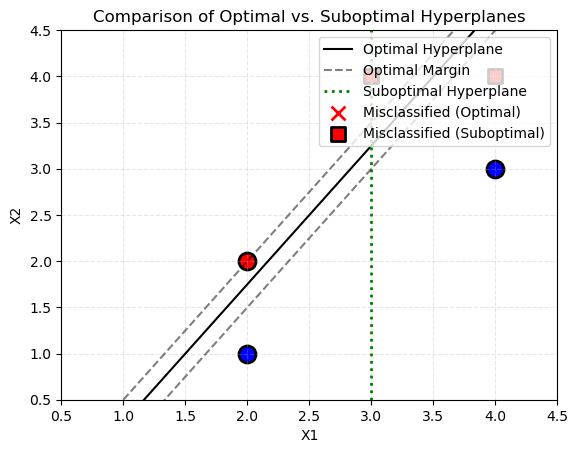

In [31]:
x1_vals = np.array([1, 4])
x2_vals = 1.5*x1_vals - 1.25
margin = 0.25
plt.plot(x1_vals, x2_vals, 'k-', label='Optimal Hyperplane')
plt.plot(x1_vals, x2_vals + margin, 'k--', alpha=0.5, label='Optimal Margin')
plt.plot(x1_vals, x2_vals - margin, 'k--', alpha=0.5)

plt.axvline(x=3, color='green', linestyle=':', linewidth=2, label='Suboptimal Hyperplane')

plt.scatter(2, 2, c='red', s=150, edgecolors='k', linewidths=2, facecolors='none')
plt.scatter(2, 1, c='blue', s=150, edgecolors='k', linewidths=2, facecolors='none')
plt.scatter(4, 3, c='blue', s=150, edgecolors='k', linewidths=2, facecolors='none')

plt.scatter(4, 4, c='red', s=100, edgecolors='k', marker='x', linewidths=2, label='Misclassified (Optimal)')
plt.scatter(3, 4, c='red', s=100, edgecolors='k', marker='s', linewidths=2, label='Misclassified (Suboptimal)')
plt.scatter(4, 4, c='red', s=100, edgecolors='k', marker='s', linewidths=2)

plt.xlim(0.5, 4.5)
plt.ylim(0.5, 4.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Comparison of Optimal vs. Suboptimal Hyperplanes')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right')
plt.show()

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

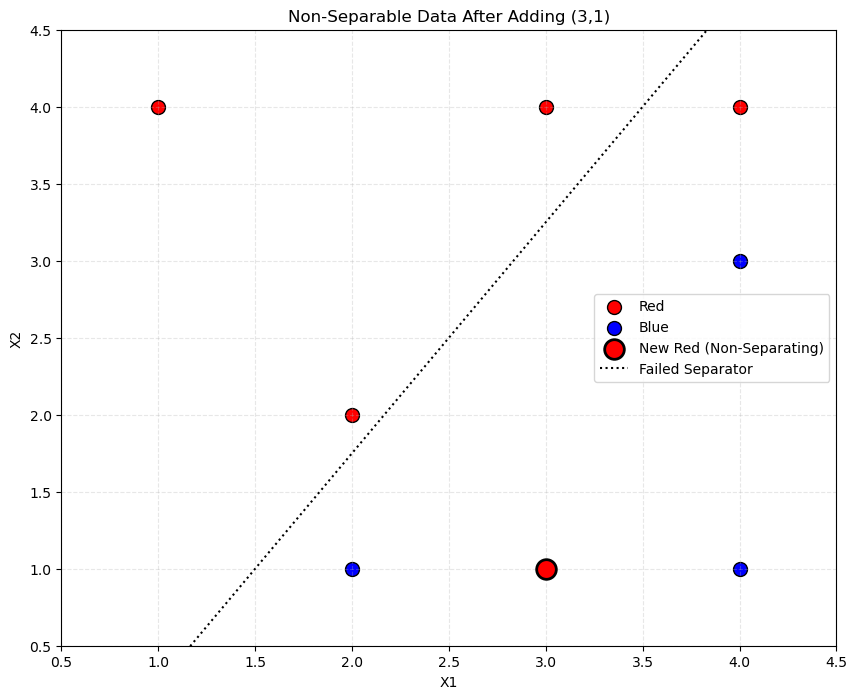

In [32]:
X_new = np.vstack([X, [3, 1]])
y_new = np.append(y, 'Red')

plt.figure(figsize=(10, 8))

for i in range(len(X_new)):
    if y_new[i] == 'Red':
        plt.scatter(X_new[i, 0], X_new[i, 1], c='red', s=100, edgecolors='k', 
                   label='Red' if i == 0 else "")
    else:
        plt.scatter(X_new[i, 0], X_new[i, 1], c='blue', s=100, edgecolors='k', 
                   label='Blue' if i == 4 else "")

plt.scatter(3, 1, c='red', s=200, edgecolors='k', linewidths=2, 
           label='New Red (Non-Separating)', zorder=10)

x1_vals = np.array([1, 4])
plt.plot(x1_vals, 1.5*x1_vals - 1.25, 'k:', label='Failed Separator')

plt.xlim(0.5, 4.5)
plt.ylim(0.5, 4.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-Separable Data After Adding (3,1)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.show()